In [1]:
pip install lightgbm catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 7.8 MB/s eta 0:00:00


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import time

from numpy import array

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor

import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error

from sklearn.model_selection import train_test_split

In [3]:
  df = pd.read_csv('data.csv')

In [4]:
df

,Area,Sensing Range,Transmission Range,Number of Sensor nodes,Number of Barriers
0,5000,15,30,100,30
1,5000,16,32,112,35
2,5000,17,34,124,42
3,5000,18,36,136,48
4,5000,19,38,148,56
...,...,...,...,...,...
177,50000,36,72,352,101
178,50000,37,74,364,107
179,50000,38,76,376,114
180,50000,39,78,388,121


In [5]:
df.shape

(182, 5)

In [6]:
import pandas as pd
import numpy as np

# Read the existing dataset from CSV
existing_data = pd.read_csv("data.csv")

# Calculate mean and standard deviation for each column
means = existing_data.mean()
stds = existing_data.std()

# Generate new data by sampling from normal distributions
new_data = pd.DataFrame()
for column in existing_data.columns:
    new_data[column] = np.random.normal(loc=means[column], scale=0.1*stds[column], size=10000)
    new_data[column] = new_data[column].clip(existing_data[column].min(), existing_data[column].max())  # Ensure values are within original range

# Save the new dataset to a new CSV file
new_data.to_csv("new_data.csv", index=False)

print("New data generated and saved to 'new_data.csv'.")


New data generated and saved to 'new_data.csv'.


In [9]:
  daf = pd.read_csv('new_data.csv')

In [10]:
print(daf.describe())

               Area  Sensing Range  Transmission Range  \
count  10000.000000   10000.000000        10000.000000   
mean   24367.863825      27.506135           54.993212   
std     1517.284391       0.754081            1.522516   
min    18652.481457      24.899753           49.205131   
25%    23356.200224      26.995213           53.987746   
50%    24356.804881      27.505177           55.003849   
75%    25382.895647      28.008281           56.023113   
max    30987.483277      30.628842           60.552593   

       Number of Sensor nodes  Number of Barriers  
count            10000.000000        10000.000000  
mean               250.032410           92.971319  
std                  9.031703            6.502110  
min                213.398941           69.228076  
25%                243.937400           88.604491  
50%                250.006082           92.949660  
75%                256.128837           97.413320  
max                289.591504          119.220589  


In [11]:
target=daf["Number of Barriers"]

In [12]:
target.head()

0    100.469181
1    106.083234
2     89.808400
3     89.857806
4     91.547170
Name: Number of Barriers, dtype: float64

In [13]:
data=daf.loc[:, ["Area","Sensing Range", "Transmission Range", "Number of Sensor nodes"]]

In [14]:
data.head()

,Area,Sensing Range,Transmission Range,Number of Sensor nodes
0,25338.897874,27.492421,55.299436,247.493511
1,27727.495286,28.394642,56.119747,250.668547
2,23552.627112,26.483725,52.267271,251.175436
3,26592.338191,26.883359,56.393107,252.429920
4,25249.541387,28.625872,53.349414,250.104415


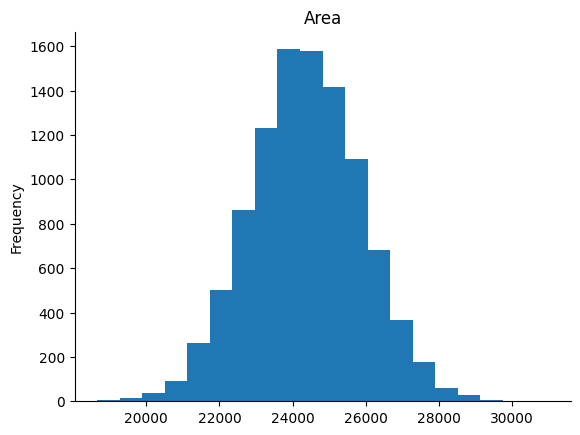

In [15]:
from matplotlib import pyplot as plt
daf['Area'].plot(kind='hist', bins=20, title='Area')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
from matplotlib import pyplot as plt
daf['Sensing Range'].plot(kind='hist', bins=20, title='Sensing Range')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
from matplotlib import pyplot as plt
daf['Transmission Range'].plot(kind='hist', bins=20, title='Transmission Range')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
from matplotlib import pyplot as plt
daf['Number of Sensor nodes'].plot(kind='hist', bins=20, title='Number of Sensor nodes')
plt.gca().spines[['top', 'right',]].set_visible(False)

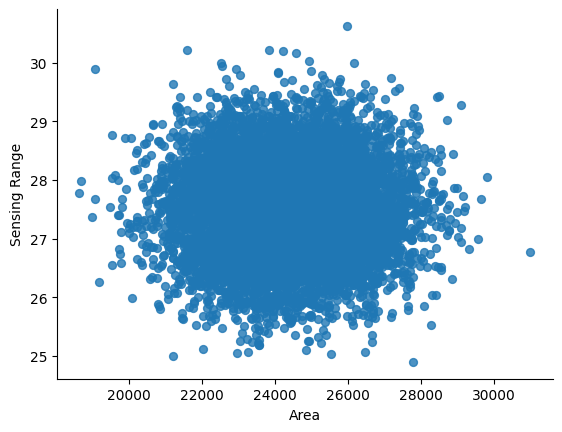

In [16]:
from matplotlib import pyplot as plt
daf.plot(kind='scatter', x='Area', y='Sensing Range', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

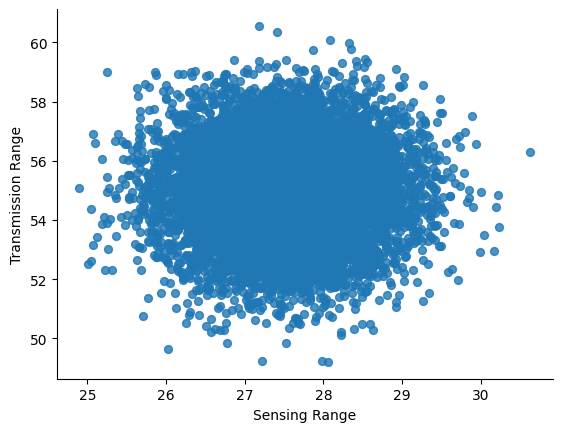

In [17]:
from matplotlib import pyplot as plt
daf.plot(kind='scatter', x='Sensing Range', y='Transmission Range', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

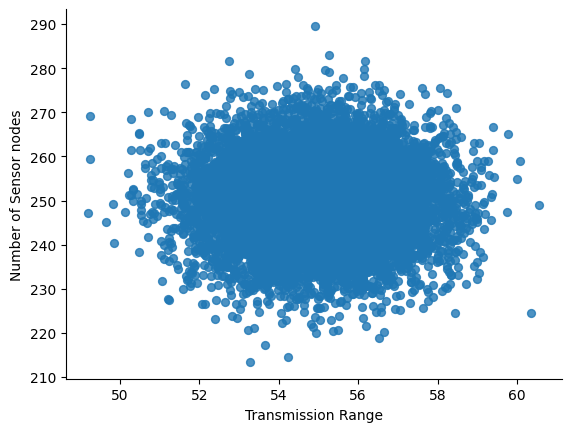

In [18]:
from matplotlib import pyplot as plt
daf.plot(kind='scatter', x='Transmission Range', y='Number of Sensor nodes', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

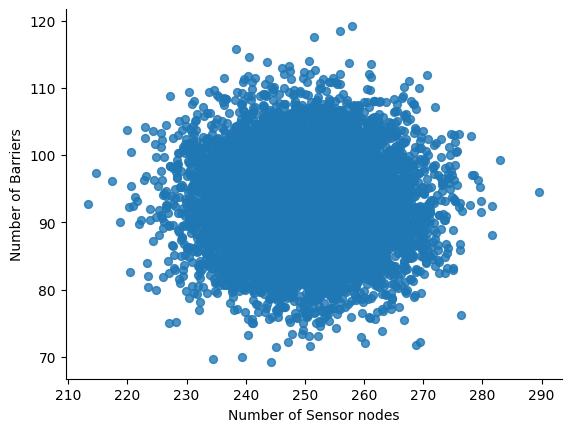

In [19]:
from matplotlib import pyplot as plt
daf.plot(kind='scatter', x='Number of Sensor nodes', y='Number of Barriers', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

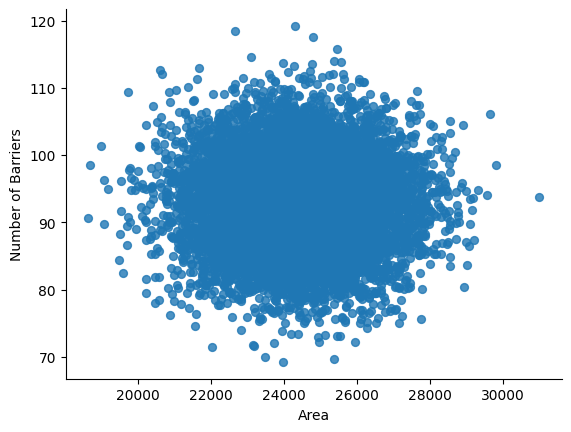

In [20]:
from matplotlib import pyplot as plt
daf.plot(kind='scatter', x='Area', y='Number of Barriers', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

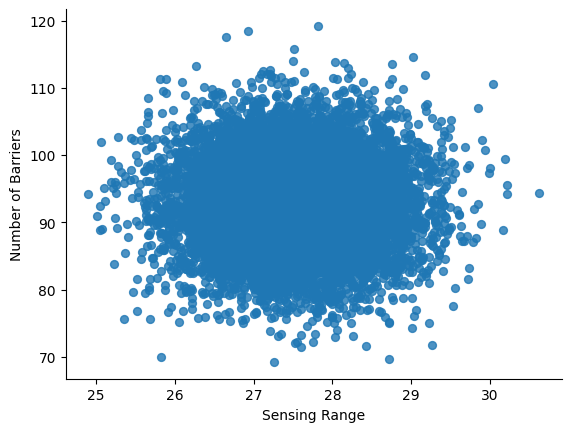

In [21]:
from matplotlib import pyplot as plt
daf.plot(kind='scatter', x='Sensing Range', y='Number of Barriers', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

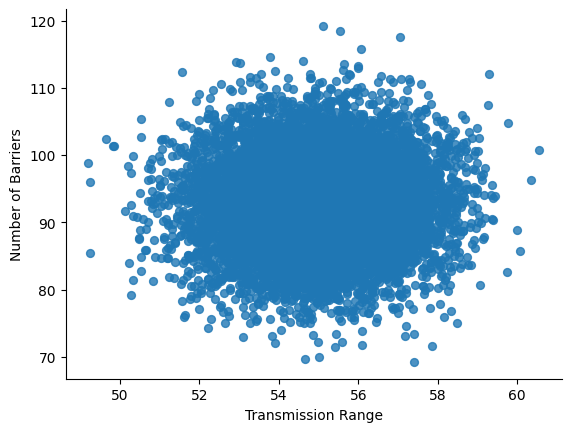

In [22]:
from matplotlib import pyplot as plt
daf.plot(kind='scatter', x='Transmission Range', y='Number of Barriers', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [23]:
X=daf.drop('Number of Barriers',axis=1)
y=daf["Number of Barriers"]

In [24]:
target=daf["Number of Barriers"]

In [25]:
X.head()

,Area,Sensing Range,Transmission Range,Number of Sensor nodes
0,25338.897874,27.492421,55.299436,247.493511
1,27727.495286,28.394642,56.119747,250.668547
2,23552.627112,26.483725,52.267271,251.175436
3,26592.338191,26.883359,56.393107,252.429920
4,25249.541387,28.625872,53.349414,250.104415


In [26]:
y.head()

0    100.469181
1    106.083234
2     89.808400
3     89.857806
4     91.547170
Name: Number of Barriers, dtype: float64

In [27]:
np.random.seed(80)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
rf_regressor = RandomForestRegressor(random_state=80)
rf_regressor.fit(X, y)
feature_importances = rf_regressor.feature_importances_

# Print feature importances
print("Feature Importances:")
for feature, importance in zip(X.columns, feature_importances):
    print(f"{feature}: {importance}")

Feature Importances:
Area: 0.24979622467544085
Sensing Range: 0.24993302386250676
Transmission Range: 0.2495856495358837
Number of Sensor nodes: 0.25068510192616866


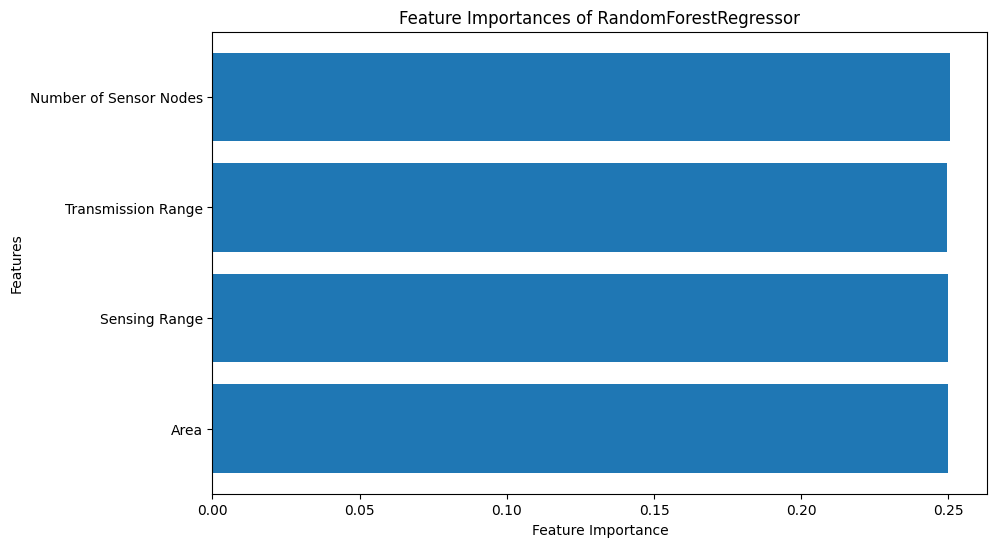

In [29]:
import matplotlib.pyplot as plt

# Define the names of the features
feature_names = ['Area', 'Sensing Range', 'Transmission Range', 'Number of Sensor Nodes']

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_importances)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importances of RandomForestRegressor')
plt.show()

In [30]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler for central mean scaling
scaler = StandardScaler(with_mean=True, with_std=False)

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data (using the parameters learned from training data)
X_test_scaled = scaler.transform(X_test)

In [31]:
from sklearn.linear_model import LinearRegression

# Define the Linear Regression model
linear_reg = LinearRegression()

# Train the model
start_time = time.time()
linear_reg.fit(X_train_scaled, y_train)
training_time = time.time() - start_time

# Predictions
y_pred = linear_reg.predict(X_test_scaled)

# Calculate evaluation metrics
r = np.sqrt(r2_score(y_test, y_pred))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
bias = np.mean(y_pred - y_test)

print("Linear Regression Evaluation Metrics:")
print("R:", r)
print("RMSE:", rmse)
print("Bias:", bias)
print("Training Time (seconds):", training_time)


Linear Regression Evaluation Metrics:
R: nan
RMSE: 6.525556036508439
Bias: -0.06171592708933886
Training Time (seconds): 0.04724407196044922


<ipython-input-31-7ac150493fa6>:15: RuntimeWarning: invalid value encountered in sqrt
  r = np.sqrt(r2_score(y_test, y_pred))


In [32]:
adaboost_reg = AdaBoostRegressor()

# Train the model
start_time = time.time()
adaboost_reg.fit(X_train_scaled, y_train)
training_time = time.time() - start_time

# Predictions
y_pred = adaboost_reg.predict(X_test_scaled)

# Calculate evaluation metrics
r = np.sqrt(r2_score(y_test, y_pred))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
bias = np.mean(y_pred - y_test)

print("AdaBoost Regression Evaluation Metrics:")
print("R:", r)
print("RMSE:", rmse)
print("Bias:", bias)
print("Training Time (seconds):", training_time)

AdaBoost Regression Evaluation Metrics:
R: nan
RMSE: 6.5450385727989335
Bias: -0.01508105651572498
Training Time (seconds): 0.30840563774108887


<ipython-input-32-b29139b5a059>:12: RuntimeWarning: invalid value encountered in sqrt
  r = np.sqrt(r2_score(y_test, y_pred))


In [33]:
from lightgbm import LGBMRegressor
# Define the LightGBM Regressor model
lgbm_reg = LGBMRegressor()

# Train the model
start_time = time.time()
lgbm_reg.fit(X_train_scaled, y_train)
training_time = time.time() - start_time

# Predictions
y_pred = lgbm_reg.predict(X_test_scaled)

# Calculate evaluation metrics
r = np.sqrt(r2_score(y_test, y_pred))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
bias = np.mean(y_pred - y_test)

print("LightGBM Regressor Evaluation Metrics:")
print("R:", r)
print("RMSE:", rmse)
print("Bias:", bias)
print("Training Time (seconds):", training_time)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000553 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1020
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 4
[LightGBM] [Info] Start training from score 92.959930
LightGBM Regressor Evaluation Metrics:
R: nan
RMSE: 6.6509384221489025
Bias: -0.020347798805291417
Training Time (seconds): 0.16009283065795898


<ipython-input-33-7e9b6e89170d>:14: RuntimeWarning: invalid value encountered in sqrt
  r = np.sqrt(r2_score(y_test, y_pred))


In [ ]:
catboost_reg = CatBoostRegressor()

# Train the model
start_time = time.time()
catboost_reg.fit(X_train_scaled, y_train)
training_time = time.time() - start_time

# Predictions
y_pred = catboost_reg.predict(X_test_scaled)

# Calculate evaluation metrics
r = np.sqrt(r2_score(y_test, y_pred))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
bias = np.mean(y_pred - y_test)

print("\nCatBoost Regressor Evaluation Metrics:")
print("R:", r)
print("RMSE:", rmse)
print("Bias:", bias)
print("Training Time (seconds):", training_time)

Learning rate set to 0.05703
0:	learn: 10.3399561	total: 49.3ms	remaining: 49.3s
1:	learn: 10.0938928	total: 51.9ms	remaining: 25.9s
2:	learn: 9.8539223	total: 54ms	remaining: 17.9s
3:	learn: 9.6425330	total: 56.1ms	remaining: 14s
4:	learn: 9.4382931	total: 58.5ms	remaining: 11.6s
5:	learn: 9.2540644	total: 60.9ms	remaining: 10.1s
6:	learn: 9.0748882	total: 62.9ms	remaining: 8.92s
7:	learn: 8.9089940	total: 65.3ms	remaining: 8.1s
8:	learn: 8.7549721	total: 67.5ms	remaining: 7.44s
9:	learn: 8.6094179	total: 70ms	remaining: 6.93s
10:	learn: 8.4763312	total: 72.3ms	remaining: 6.5s
11:	learn: 8.3486242	total: 75.1ms	remaining: 6.18s
12:	learn: 8.2309483	total: 77.2ms	remaining: 5.86s
13:	learn: 8.1221742	total: 79.4ms	remaining: 5.59s
14:	learn: 8.0186203	total: 81.8ms	remaining: 5.37s
15:	learn: 7.9258039	total: 83.9ms	remaining: 5.16s
16:	learn: 7.8437052	total: 86.1ms	remaining: 4.98s
17:	learn: 7.7622760	total: 88.3ms	remaining: 4.82s
18:	learn: 7.6917833	total: 90.7ms	remaining: 4.68s

In [ ]:
import xgboost as xgb

# Define the XGBoost Regression model
xgboost_reg = xgb.XGBRegressor()

# Train the model
start_time = time.time()
xgboost_reg.fit(X_train_scaled, y_train)
training_time = time.time() - start_time

# Predictions
y_pred = xgboost_reg.predict(X_test_scaled)

# Calculate evaluation metrics
r = np.sqrt(r2_score(y_test, y_pred))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
bias = np.mean(y_pred - y_test)

print("XGBoost Regression Evaluation Metrics:")
print("R:", r)
print("RMSE:", rmse)
print("Bias:", bias)
print("Training Time (seconds):", training_time)

XGBoost Regression Evaluation Metrics:
R: 0.7575401295281621
RMSE: 7.7526606548837425
Bias: -0.21125118617592886
Training Time (seconds): 0.20987367630004883


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'learning_rate': [0.01, 0.1, 0.3],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.5, 0.7, 1.0],
    'colsample_bytree': [0.5, 0.7, 1.0],
    'n_estimators': [100, 200, 300]
}

# Initialize the XGBoost Regression model
xgboost_reg = xgb.XGBRegressor()

# Perform grid search cross-validation
grid_search = GridSearchCV(estimator=xgboost_reg, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
start_time = time.time()
grid_search.fit(X_train_scaled, y_train)
training_time = time.time() - start_time

# Get the best model from grid search
best_xgboost_reg = grid_search.best_estimator_

# Predictions
y_pred = best_xgboost_reg.predict(X_test_scaled)

# Calculate evaluation metrics
r = np.sqrt(r2_score(y_test, y_pred))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
bias = np.mean(y_pred - y_test)

print("XGBoost Regression Evaluation Metrics:")
print("R:", r)
print("RMSE:", rmse)
print("Bias:", bias)
print("Training Time (seconds):", training_time)
print("Best Parameters:", grid_search.best_params_)


XGBoost Regression Evaluation Metrics:
R: 0.7955265508643182
RMSE: 7.1960238241843975
Bias: -0.22870268738458674
Training Time (seconds): 585.1315062046051
Best Parameters: {'colsample_bytree': 0.5, 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 3, 'n_estimators': 100, 'subsample': 0.7}


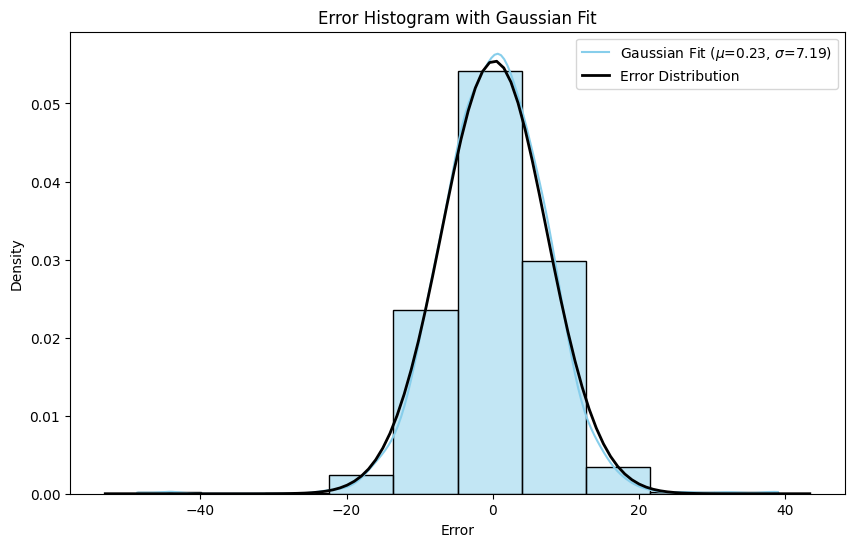

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

# Calculate the errors
errors = y_test - y_pred

# Plot the error histogram
plt.figure(figsize=(10, 6))
sns.histplot(errors, bins=10, kde=True, stat='density', color='skyblue')

# Fit a continuous Gaussian distribution to the error distribution
mu, std = norm.fit(errors)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)

# Add labels and title
plt.xlabel('Error')
plt.ylabel('Density')
plt.title('Error Histogram with Gaussian Fit')

# Add legend with Gaussian fit parameters
plt.legend(['Gaussian Fit ($\mu$={:.2f}, $\sigma$={:.2f})'.format(mu, std), 'Error Distribution'])

plt.show()


In [ ]:
daf


,Area,Sensing Range,Transmission Range,Number of Sensor nodes,Number of Barriers
0,5000,15,30,100,30
1,5000,16,32,112,35
2,5000,17,34,124,42
3,5000,18,36,136,48
4,5000,19,38,148,56
...,...,...,...,...,...
10177,35476,36,79,496,208
10178,20414,19,45,345,28
10179,21910,34,72,343,88
10180,49201,19,47,198,58
